## Symantic Spotter: Build a RAG System using LlamaIndex







 #### Option  1: Insurance domain + Build the rag pipeline using llamaindex.


```
### Here are Step by Step Details for Building a RAG system using LlamaIndex
```


### Why RAG ?

#### Part 0 - RAG Architecture.


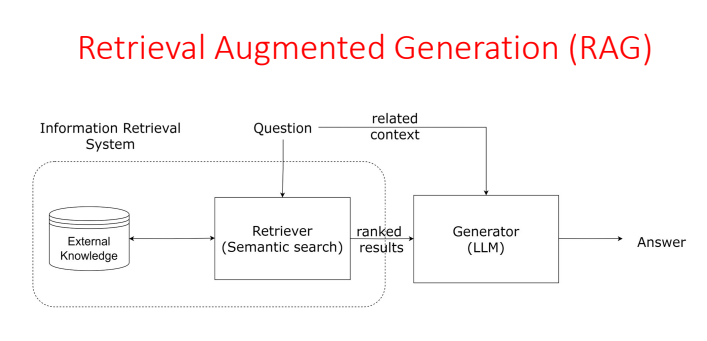

Without RAG: LLM's don't have any information on the domain/enterprise specific query.



Using  RAG We are can connect an external data ingested & transformed embeddings into vectorDB. We can peform Semantic search or say dot product or cosine similarity and return  top k relevant documents. We can then pass this return context along with  user query using decorated prompt engineering to llm to repspond to user query from domain specific docs say here insurance documents.

 RAG also helps to cache the latest query and answer in cache. If check in similary query present in cache  if yes return from cache. If not found in cache then perform semantic search and using context check with llm for query. results in cache return from cache from save usig past coversation else perfrom sematic search search in vector with top k context generate the response usign llm.

 RAG also helps in overcoming the problem of fixed token size issues with Llm and hallucination.



### Why LlamaIndex?






LlamaIndex is an innovative data framework specially designed to support LLM-based RAG framework application development. It offers an advanced framework that empowers developers to integrate diverse data sources with large language models.

LlamaIndex includes a variety of file formats, such as PDFs and PowerPoints, as well as applications like Notion and Slack and even databases like Postgres and MongoDB.

The framework brings an array of connectors that assist in data ingestion, facilitating a seamless interaction with LLMs. Moreover, LlamaIndex boasts an efficient data retrieval and query interface.

LlamaIndex enables developers to input any LLM prompt and, in return, receive an output that is both context-rich and knowledge-augmementation.
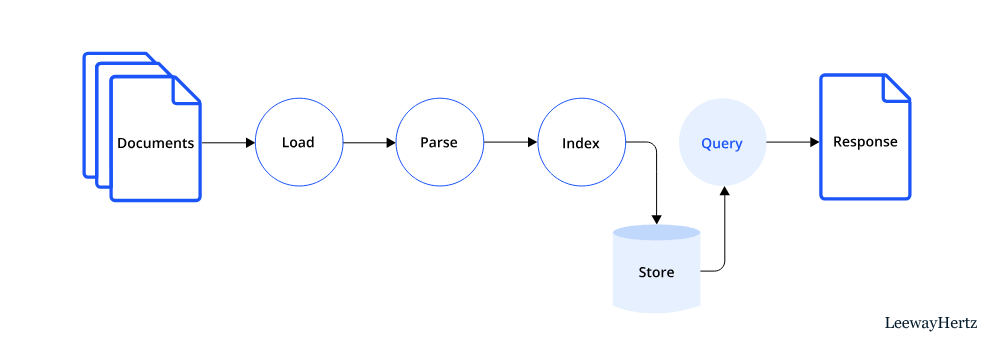


#### key Feature of LlamaIndex:
*   Data connectors allow ingestion from various data sources and formats.

*   It can synthesize data from multiple documents or heterogeneous data sources.
* It provides numerous integrations with vector stores, ChatGPT plugins, tracing tools, LangChain, and more.





### Part 1 - Overall Product Specifications

***Problem Statement*** - Build a robust generative search system capable of effectively and accurately answering questions from a list of HDFC Insurance policy documents.

***Solution Strategy*** - Build a solution which should solve the following requirements:

- Users would responses from insurance policy knowledge base.
- If user want to perform a query system must be able to response to query accurately.

***Goal*** - Solving the above two requirements well in and would ensure that the accuracy of the overall model is good.

***Data Used*** -HDFC Insuracne policy documetns sotred in single folder

***Tools used*** - LlamaIndex, GhatGPT has been used due to its powerful query engine, fast data processing using data loaders and directory readers as well as easier and faster implementation using fewer lines of code.

### Part 2 - Proposed Solution

In this section, we go ahead and actually build the solution that we proposed in the previous step using Llamindex. Here is the architecture.

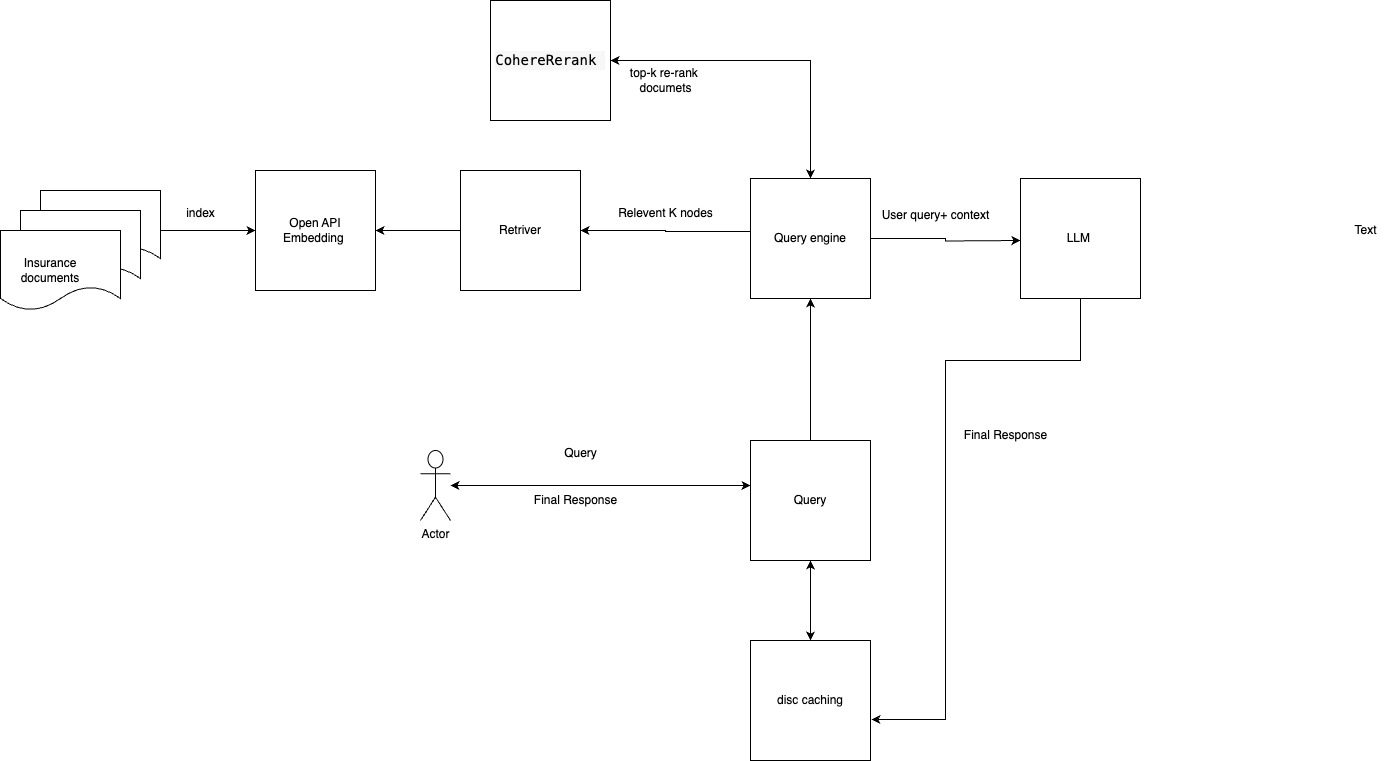

#####  Discriptions about the Architecture:


1. *Documents*: We will be using list of HDFC insurance documents provides inside a single folder.

2. *Open API embedding*: We ars using OpenAPI embedding as Vector DB for indexing insureance documetns in the form of embedding.

3. *Query Engine*: We are using Query Engine Module of Llammaindex for perfomring synantic Search. Query Engine will use internally Retriver and Cohere Rerank to retrrive top-k relvent nodes from embedding.

4. *LLM* : top k-documets  along with usewr query will be passed to LLM to generate the accurate response.

5. *Caching*:" Caching is being used to improve the read operation. Recent similar search will be store in Caching and user query frist will be served from Cahcing. If user query not found in cahce then query will be  forwared to query engine and then LLM to geneate the resposne. user query and generated resposne will be cached in in cache and will be served from there based ttl.

6. *Meta data*:Along with Resposne we are also returning docs referece and similary score to improve the user confidence towards the implemented RAG system.

7. *Cohere-Rerank*: Is being used to rerank the query based on semantic score.






*Step* 1  : Import the necessary libraries







In [1]:
#Load llamaindex
!pip install llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing inst

In [2]:
!pip install openai

In [3]:
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

Step 2 : Mount your Google Drive and Set the API key

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Set the API key
keypath = "/content/drive/My Drive/GEN AI/RAG/"

with open(keypath + "OpenAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines()).replace('\ufeff','')


Step 3 - Data Loading


***2 ways to do this***

- If you have a single file containing all the required data, use a data loader from [LLamahub](https://llamahub.ai/)

- If you have multiple files, use *Simple Directory Reader* Just ensure that for reading each file type the necessary dependency libraries are already installed.

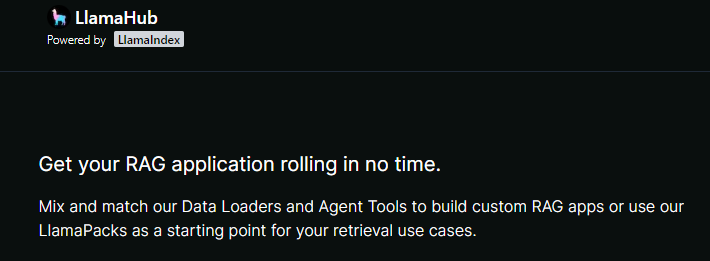

Recommendation - No matter how powerful the given data loader is, ensure that your file is properly formatted, and the loader is able to read the file clearly. Else the query engine might fail

In [6]:
# reading the multiple files for insurance data.
from llama_index.core import SimpleDirectoryReader, ServiceContext, VectorStoreIndex
reader = SimpleDirectoryReader(input_dir="/content/drive/My Drive/GEN AI/Semantic_Spotter/data/")

In [7]:
documents = reader.load_data()
print(f"Loaded {len(documents)} docs")

Loaded 217 docs


In [ ]:
documents

[Document(id_='d0481371-20f2-4ed7-9f1c-7d17ee29ed16', embedding=None, metadata={'page_label': '1', 'file_name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_path': '/content/drive/My Drive/GEN AI/Semantic_Spotter/data/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_type': 'application/pdf', 'file_size': 1303156, 'creation_date': '2024-09-21', 'last_modified_date': '2024-09-21'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n             Part A \n<<Date>> \n<<Policyholder’s Name>>  \n<<Policyholder’s Address>> \n<<Policyholder’s Contact Number>>  \n \nDear <<Policyholder’s Name>>,  \n \nSub: Your Policy no. <<  >> \nWe are glad to inform you that your proposal has been accepted and the HDFC Life Easy Health

Step 4 - Building the query engine

In [8]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core.indices.vector_store.base import VectorStoreIndex
#from llama_index import VectorStoreIndex
from IPython.display import display, HTML


# # build index
index = VectorStoreIndex(documents)

# Construct Query Engine
query_engine = index.as_query_engine()

Step 5 - Checking respones and respone parameters

In [9]:
response = query_engine.query("what will happen if If Nominee(s) die after the Policyholder but before his share of the amount secured under the Policy is paid?")

In [10]:
#Checking the response
response.response

'The share of the deceased Nominee(s) will be payable to the heirs or legal representative of the Nominee or the holder of the succession certificate of such Nominee(s).'

In [11]:
#Check the source node
response.source_nodes

[NodeWithScore(node=Document(id_='5f102e5e-ada3-4f85-a20b-35fa6c06a188', embedding=None, metadata={'page_label': '30', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '/content/drive/My Drive/GEN AI/Semantic_Spotter/data/HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_type': 'application/pdf', 'file_size': 1990500, 'creation_date': '2024-09-21', 'last_modified_date': '2024-09-21'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n  \n14. If Nominee(s) die after the Policyholder but before his share of the amount secured under the Policy is paid, the share of the \nexpired Nominee(s) shall be payable to the heirs or legal repre sentative of the Nominee or holder of succession certificate o

In [12]:
#Extract the file name
response.source_nodes[0].node.metadata['file_name']

'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf'

In [13]:
#Extract the score
response.source_nodes[1].score

0.8666313814123779

In [14]:
# customizing the prompts.
from llama_index.core import PromptTemplate

text_qa_template_str = (
    "Context information is"
    " below.\n---------------------\n{context_str}\n---------------------\nUsing"
    " both the context information and also using your own knowledge, answer"
    " the question: {query_str}\nIf the context isn't helpful, you can also"
    " answer the question on your own.\n"
)
text_qa_template = PromptTemplate(text_qa_template_str)


refine_template_str = (
    "The original question is as follows: {query_str}\nWe have provided an"
    " existing answer: {existing_answer}\nWe have the opportunity to refine"
    " the existing answer (only if needed) with some more context"
    " below.\n------------\n{context_msg}\n------------\nUsing both the new"
    " context and your own knowledge, update or repeat the existing answer.\n"
)
refine_template = PromptTemplate(refine_template_str)


In [26]:
!pip install llama-index-postprocessor-cohere-rerank

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.0 MB/s eta 0:00:00


In [27]:
from google.colab import userdata
cohere_api_key = userdata.get('cohere_key')

In [28]:
llm = OpenAI(model="gpt-3.5-turbo")
import os
from llama_index.postprocessor.cohere_rerank import CohereRerank


cohere_rerank = CohereRerank(api_key=cohere_api_key, top_n=3)
response=index.as_query_engine(
        similarity_top_k=3,
        node_postprocessors=[cohere_rerank],
        text_qa_template=text_qa_template,
        refine_template=refine_template,
        llm=llm
)

Step 6 - Creating a response Pipeline

User receives the response and the document that they can refer to

In [15]:
def initialize_conv():
  print('Feel free to ask Questions regarding HDFC insurance.Press exit once you are done')
  while True:
    user_input = input()
    if user_input.lower() == 'exit':
      print('Exiting the program... bye')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:20px">{response}</p>'))

Step 7 - Build a Testing Pipeline

Here we feed a series of questions to the Q/A bot and store the responses along with the feedback on whether it's accurate or not from the user

In [16]:
# Definig the user query.
questions = ['what is beneficiary in HDFC insurance policy', 'Which is company name is talking about in provided context?',' who is eligible member in the context of insurance policy?',
             'when a person can recieve the claims?']


In [17]:
!pip install diskcache
import openai
import diskcache as dc

cache = dc.Cache('./gpt_cache')





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.7 MB/s eta 0:00:00


In [20]:
def query_response(user_input):
    final_response=""
    cache_response=None
    cache_response=cache.get(user_input)
    if cache_response is None:
      response=query_engine.query(user_input)
      print("Answer from LLM:\n")
      file_name = response.source_nodes[0].node.metadata['file_name']
      response = response.response + '\nCheck further at ' + file_name + ' for document references.'+'\nSimilarity score is :' + str(response.source_nodes[1].score)
      cache.set(user_input, response)
      final_response=response
    else:
      print("Answer  from cache:\n")
      final_response=cache_response

    return final_response




In [21]:
print(query_response("when a person can recieve the claims"))


Answer from LLM:

A person can receive the claims after submitting all necessary claim documents within 60 days from the date of diagnosis of the condition. However, the insurance company may consider condoning the delay in claim intimation if valid reasons are provided for the delay.
Check further at HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf for document references.
Similarity score is :0.8084087876502873


In [22]:
def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    test_feedback.append((i,query_response(i),user_input))
  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Good or Bad'])
  return feedback_df

In [23]:
import pandas as pd

In [24]:
testing_pipeline(questions)

what is beneficiary in HDFC insurance policy
Answer from LLM:

The beneficiary in HDFC insurance policy is the individual or entity designated by the insured member to receive the benefits under the policy in the event of the insured member's death.
Check further at HDFC-Life-Group-Term-Life-Policy.pdf for document references.
Similarity score is :0.8302614120158496

 Please provide your feedback on the response provided by the bot
good
Answer  from cache:

Which is company name is talking about in provided context?
Answer from LLM:

HDFC Life
Check further at HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf for document references.
Similarity score is :0.7637737401593171

 Please provide your feedback on the response provided by the bot
goood
Answer  from cache:

 who is eligible member in the context of insurance policy?
Answer from LLM:

An eligible member in the context of the insurance policy is a person who satisfies the eligibility criteria mentioned in the policy a

,Question,Response,Good or Bad
0,what is beneficiary in HDFC insurance policy,The beneficiary in HDFC insurance policy is th...,good
1,Which is company name is talking about in prov...,HDFC Life\nCheck further at HDFC-Life-Sampoorn...,goood
2,who is eligible member in the context of insu...,An eligible member in the context of the insur...,good
3,when a person can recieve the claims?,A person can receive the claims after submitti...,good


In [25]:
print(query_response("what is beneficiary in HDFC insurance policy?"))


Answer from LLM:

The beneficiary in HDFC insurance policy is the individual or entity designated by the insured member to receive the benefits under the policy in the event of the insured member's death.
Check further at HDFC-Life-Group-Term-Life-Policy.pdf for document references.
Similarity score is :0.8417056504505427


### Chalenges Faced:
Tried to use GPTCache with for caching system,but due compatibility issues couldnot use it.
### Alnative Solution:
Used disc caching for alternative to GPTCache.